In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from config import api_key

from citipy import citipy

output_file = "python-api-challenge/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

In [3]:
# lat_lngs and cities list
lat_lngs = []
cities = []

# random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    if city not in cities:
        cities.append(city)


len(cities)

632

In [4]:
#Cities data frame
Cities_DF = pd.DataFrame({"City":cities})
Cities_DF["Temperature(F)"] =""
Cities_DF["Humidity(%)"] =""
Cities_DF["Cloudiness(%)"] =""
Cities_DF["Wind Speed(mph)"] =""
Cities_DF["Latitude"]=""
Cities_DF["Longitude"]=""
Cities_DF.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in Cities_DF.iterrows():
    city =row["City"]
    response = requests.get(query_url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    city_weather_url =response.url
    print(response.url)
    
    try:
        Cities_DF.loc[index,"Temperature(F)"]=city_weather['main']['temp']
        Cities_DF.loc[index,"Humidity(%)"]=city_weather['main']['humidity']
        Cities_DF.loc[index,"Cloudiness(%)"]=city_weather['clouds']['all']
        Cities_DF.loc[index,"Wind Speed(mph)"]=city_weather['wind']['speed']
        Cities_DF.loc[index,"Latitude"]=city_weather['coord']['lat']
        Cities_DF.loc[index,"Longitude"]=city_weather["coord"]['lon']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

print(Cities_DF)

Beginning Data Retrieval
------------------------
Processing Record 0 | namibe
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=namibe
Processing Record 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=butaritari
Processing Record 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=jamestown
Processing Record 3 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=mahebourg
Processing Record 4 | iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=iqaluit
Processing Record 5 | guisijan
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=guisijan
Processing Record 6 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=990da

Processing Record 56 | porbandar
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=porbandar
Processing Record 57 | saint augustine
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=saint%20augustine
Processing Record 58 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=bethel
Processing Record 59 | portland
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=portland
Processing Record 60 | tairua
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=tairua
Processing Record 61 | pundaguitan
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=pundaguitan
Processing Record 62 | grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c

Processing Record 111 | east london
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=east%20london
Processing Record 112 | temuco
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=temuco
Processing Record 113 | bonavista
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=bonavista
Processing Record 114 | samana
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=samana
Processing Record 115 | santo antonio do ica
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=santo%20antonio%20do%20ica
Processing Record 116 | carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=carnarvon
Processing Record 117 | fortuna
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908e

Processing Record 167 | marcona
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=marcona
City not found... skipping.
Processing Record 168 | souillac
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=souillac
Processing Record 169 | marienburg
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=marienburg
Processing Record 170 | tessalit
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=tessalit
Processing Record 171 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=bredasdorp
Processing Record 172 | odesskoye
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=odesskoye
Processing Record 173 | naryan-mar
http://api.openweathermap.org/data/2.5/weather?appid=990da9

Processing Record 222 | saint andrews
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=saint%20andrews
Processing Record 223 | kenora
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=kenora
Processing Record 224 | laguna
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=laguna
Processing Record 225 | ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=ixtapa
Processing Record 226 | paso de carrasco
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=paso%20de%20carrasco
Processing Record 227 | develi
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=develi
Processing Record 228 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e9

Processing Record 278 | jalu
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=jalu
Processing Record 279 | santiago de cuba
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=santiago%20de%20cuba
Processing Record 280 | snasa
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=snasa
Processing Record 281 | smirnykh
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=smirnykh
Processing Record 282 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=pangnirtung
Processing Record 283 | khonuu
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=khonuu
City not found... skipping.
Processing Record 284 | labutta
http://api.openweathermap.org/data/2.5/weather?appid=990da9c90

Processing Record 333 | riviere-au-renard
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=riviere-au-renard
Processing Record 334 | walvis bay
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=walvis%20bay
Processing Record 335 | maloy
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=maloy
Processing Record 336 | fevralsk
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=fevralsk
City not found... skipping.
Processing Record 337 | ausa
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=ausa
Processing Record 338 | skegness
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=skegness
Processing Record 339 | kurush
http://api.openweathermap.org/data/2.5/weather?appid=990da9c9

Processing Record 389 | sand springs
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=sand%20springs
Processing Record 390 | brazzaville
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=brazzaville
Processing Record 391 | wanning
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=wanning
Processing Record 392 | carutapera
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=carutapera
Processing Record 393 | dingle
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=dingle
Processing Record 394 | vega de alatorre
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=vega%20de%20alatorre
Processing Record 395 | kumluca
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908e

Processing Record 444 | praia da vitoria
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=praia%20da%20vitoria
Processing Record 445 | nioro
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=nioro
Processing Record 446 | makinsk
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=makinsk
Processing Record 447 | rundu
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=rundu
Processing Record 448 | caohe
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=caohe
Processing Record 449 | trincomalee
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=trincomalee
Processing Record 450 | cidreira
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units

Processing Record 500 | poya
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=poya
Processing Record 501 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=bandarbeyla
Processing Record 502 | oristano
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=oristano
Processing Record 503 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=santiago%20del%20estero
Processing Record 504 | baykit
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=baykit
Processing Record 505 | kuche
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=kuche
City not found... skipping.
Processing Record 506 | arman
http://api.openweathermap.org/data/2.5/weather?appid=990da

Processing Record 555 | hanover
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=hanover
Processing Record 556 | mukhtolovo
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=mukhtolovo
Processing Record 557 | balimo
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=balimo
City not found... skipping.
Processing Record 558 | emerald
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=emerald
Processing Record 559 | black river
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=black%20river
Processing Record 560 | jacareacanga
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=jacareacanga
Processing Record 561 | eyrarbakki
http://api.openweathermap.org/data/2.5/weather?appid=99

Processing Record 611 | asau
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=asau
Processing Record 612 | shanhetun
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=shanhetun
Processing Record 613 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=coihaique
Processing Record 614 | biak
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=biak
Processing Record 615 | buenavista
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=buenavista
Processing Record 616 | caucaia
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=caucaia
Processing Record 617 | jaisalmer
http://api.openweathermap.org/data/2.5/weather?appid=990da9c908efb8d5e906c2f9cb454885&units=imperial&q=jai

In [5]:
Cities_DF.dropna(axis=0, inplace=True)

Cities_DF.to_csv('data_output.csv')
Cities_DF.head()

,City,Temperature(F),Humidity(%),Cloudiness(%),Wind Speed(mph),Latitude,Longitude
0,namibe,82.4,47,20,6.91,-15.1961,12.1522
1,butaritari,81.09,78,85,17.92,3.0707,172.79
2,jamestown,35.24,80,1,11.5,42.097,-79.2353
3,mahebourg,86,74,40,16.11,-20.4081,57.7
4,iqaluit,-11.09,77,90,3.89,63.7506,-68.5145


In [6]:
Temperature_DF = Cities_DF[["Latitude", "Temperature(F)"]]

In [7]:
Temperature_DF.head()

,Latitude,Temperature(F)
0,-15.1961,82.4
1,3.0707,81.09
2,42.097,35.24
3,-20.4081,86
4,63.7506,-11.09


In [8]:
Cities_DF['Latitude'] = Cities_DF['Latitude'].astype(str)
Cities_DF['Temperature(F)'] = pd.to_numeric(Cities_DF['Temperature(F)'],errors='coerce')

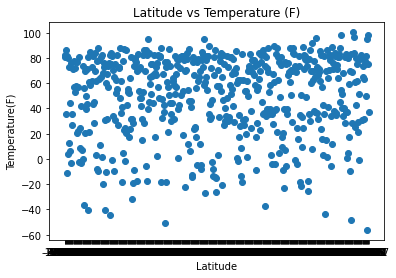

<Figure size 432x288 with 0 Axes>

In [11]:
plt.title("Latitude vs Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

x_values = Cities_DF["Latitude"]
y_values = Cities_DF["Temperature(F)"]
plt.scatter(x_values,y_values)
plt.show()
plt.savefig("./Images/Temperature.png")

In [13]:
Humidity_DF = Cities_DF[["Latitude", "Humidity(%)"]]

In [17]:
Cities_DF['Latitude'] = Cities_DF['Latitude'].astype(str)
Cities_DF['Humidity(%)'] = pd.to_numeric(Cities_DF['Humidity(%)'],errors='coerce')

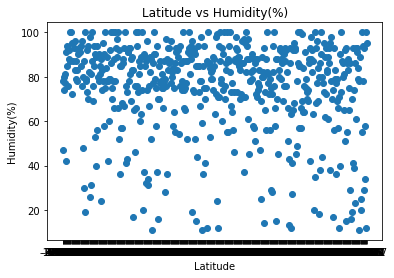

<Figure size 432x288 with 0 Axes>

In [18]:
plt.title("Latitude vs Humidity(%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

x_values = Cities_DF["Latitude"]
y_values = Cities_DF["Humidity(%)"]
plt.scatter(x_values,y_values)
plt.show()
plt.savefig("./Images/Humidity.png")

In [19]:
Cities_DF['Latitude'] = Cities_DF['Latitude'].astype(str)
Cities_DF['Cloudiness(%)'] = pd.to_numeric(Cities_DF['Cloudiness(%)'],errors='coerce')

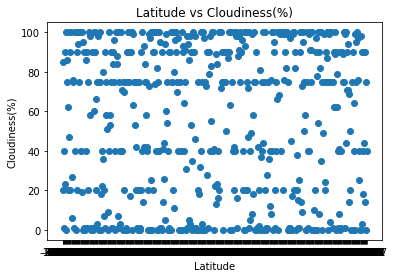

<Figure size 432x288 with 0 Axes>

In [21]:
plt.title("Latitude vs Cloudiness(%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

x_values = Cities_DF["Latitude"]
y_values = Cities_DF["Cloudiness(%)"]
plt.scatter(x_values,y_values)
plt.show()
plt.savefig("./Images/Cloudiness.png")

In [22]:
Cities_DF['Latitude'] = Cities_DF['Latitude'].astype(str)
Cities_DF['Wind Speed(mph)'] = pd.to_numeric(Cities_DF['Wind Speed(mph)'],errors='coerce')

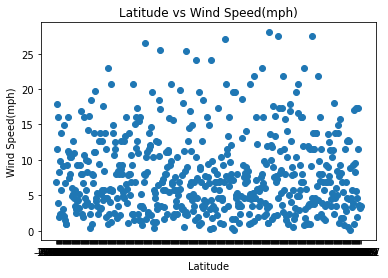

<Figure size 432x288 with 0 Axes>

In [23]:
plt.title("Latitude vs Wind Speed(mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

x_values = Cities_DF["Latitude"]
y_values = Cities_DF["Wind Speed(mph)"]
plt.scatter(x_values,y_values)
plt.show()
plt.savefig("./Images/Wind Speed.png")

In [29]:
Cities_DF['Latitude'] = Cities_DF['Latitude'].astype(str)
Cities_DF['Latitude'] = pd.to_numeric(Cities_DF['Latitude'],errors='coerce')

In [30]:
north_hemisphere = Cities_DF.loc[Cities_DF["Latitude"] >= 0]
south_hemisphere = Cities_DF.loc[Cities_DF["Latitude"] < 0]

In [40]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.86


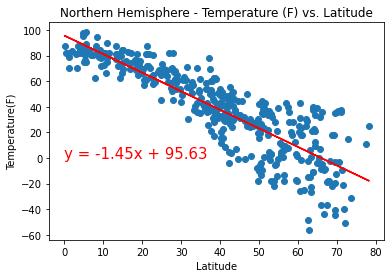

In [39]:
equation = linear_agression(north_hemisphere["Latitude"], north_hemisphere["Temperature(F)"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

plt.savefig("./Images/Northern Hemisphere - Temperature (F) vs. Latitude.png")

The r-squared is : 0.56


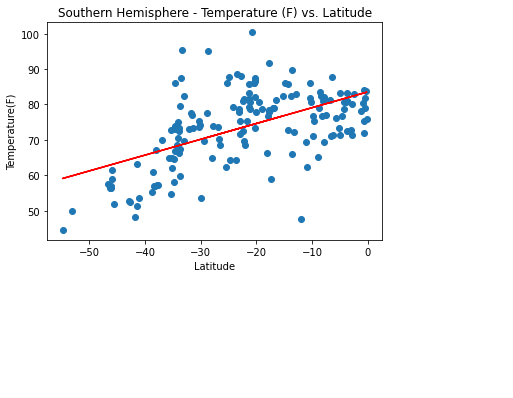

In [41]:
equation = linear_agression(south_hemisphere["Latitude"], south_hemisphere["Temperature(F)"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")

plt.savefig("./Images/Southern Hemisphere - Temperature (F) vs. Latitude.png")

The r-squared is : 0.41


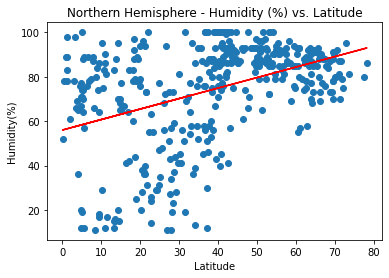

In [35]:
equation = linear_agression(north_hemisphere["Latitude"], north_hemisphere["Humidity(%)"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig("./Images/Northern Hemisphere - Humidity (%) vs. Latitude.png")

The r-squared is : 0.07


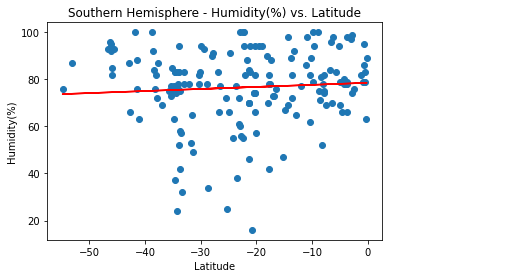

In [42]:
equation = linear_agression(south_hemisphere["Latitude"], south_hemisphere["Humidity(%)"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Humidity(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")

plt.savefig("./Images/Southern Hemisphere - Humidity (%) vs. Latitude.png")

The r-squared is : 0.28


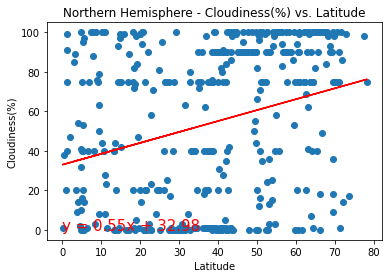

In [37]:
equation = linear_agression(north_hemisphere["Latitude"], north_hemisphere["Cloudiness(%)"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Cloudiness(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.savefig("./Images/Northern Hemisphere - Cloudiness(%) vs. Latitude.png")

The r-squared is : 0.29


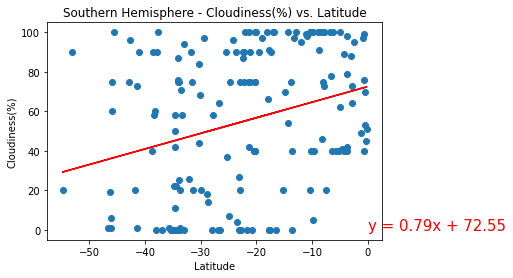

In [47]:
equation = linear_agression(south_hemisphere["Latitude"], south_hemisphere["Cloudiness(%)"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Cloudiness(%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

plt.savefig("./Images/Southern Hemisphere - Cloudiness(%) vs. Latitude.png")

The r-squared is : -0.02


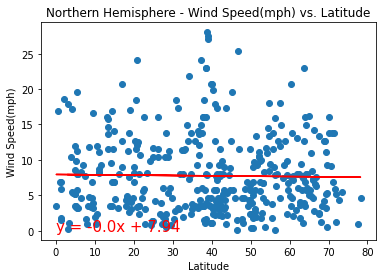

In [46]:
equation = linear_agression(north_hemisphere["Latitude"], north_hemisphere["Wind Speed(mph)"])
annotate(equation, 0, 0)
plt.title("Northern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

plt.savefig("./Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

The r-squared is : -0.14


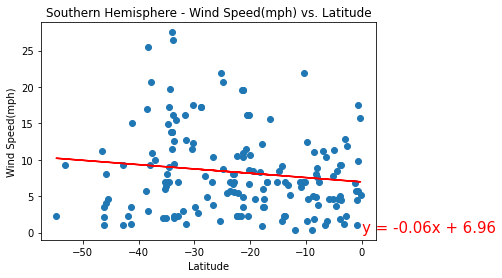

In [48]:
equation = linear_agression(south_hemisphere["Latitude"], south_hemisphere["Wind Speed(mph)"])
annotate(equation, 0, 0)
plt.title("Southern Hemisphere - Wind Speed(mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

plt.savefig("./Images/Southern Hemisphere - Wind Speed(mph) vs. Latitude.png")